<a href="https://colab.research.google.com/github/Isaque-TW/DataScience/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


# **ESTRUTURA DO PROJETO**

**PASSO 1 - Importar as bibliotecas necessárias**

In [2]:
# A biblioteca "os" do Python oferece um conjunto de funções que permite interagir com o sistema operacional para realizar tarefas como manipulação de arquivos e diretórios, obtenção de informações do sistema, etc. Cria/remove pastas/arquivos renomeia
# Importando HTML para usar dentro do contexto do Google Collab que é Web. Livro especifico IPython.display que é usado para o retorno/display que costumamos usar.
import os
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns # Biblioteca de gráfico
import numpy as np # O numpy é uma biblioteca do Python utilizada para realizar operações

**PASSO 2 - Percorrer todos os arquivos (planilhas) existentes dentro de uma pasta no Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Biblioteca usada para percorrer todos os arquivos/planilhas existentes dentro de uma pasta no Google Drive. Acessa o Google Drive e traz uma relação/lista de todas as planilhas que queremos trabalhar. -Manipulando o sistema: Google Drive- listdir=listDiretório
# Lista o caminho/diretorio e armazena dentro da variável lista_planilhas
lista_planilhas = os.listdir('/content/drive/MyDrive/Python para Ciência de Dados/Projeto2/Arquivos')
display(lista_planilhas)

['Devolucoes+-+Belo+Horizonte.csv',
 'Devolucoes+-+Curitiba.csv',
 'Devolucoes+-+Fortaleza.csv',
 'Devolucoes+-+Goiás.csv',
 'Devolucoes+-+Porto+Alegre.csv',
 'Devolucoes+-+Recife.csv',
 'Devolucoes+-+Rio+de+Janeiro.csv',
 'Devolucoes+-+Salvador.csv',
 'Devolucoes+-+São+Paulo.csv',
 'Vendas+-+Belo+Horizonte.csv',
 'Vendas+-+Curitiba.csv',
 'Vendas+-+Fortaleza.csv',
 'Vendas+-+Goiás.csv',
 'Vendas+-+Porto+Alegre.csv',
 'Vendas+-+Recife.csv',
 'Vendas+-+Rio+de+Janeiro.csv',
 'Vendas+-+Salvador.csv',
 'Vendas+-+São+Paulo.csv']

**PASSO 3 - Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**

In [5]:
total_vendas = pd.DataFrame() # Transformando a variavel como unica/DataFrame tabela virtual. Concatena todas as informações que tabela = pd for recuperado e armazenando aqui
for planilha in lista_planilhas:
  if 'Vendas' in planilha:
    # print(planilha)
    # print(f'/content/drive/MyDrive/Python para Ciência de Dados/Projeto2/Arquivos{planilha}')
    tabela = pd.read_csv(f'/content/drive/MyDrive/Python para Ciência de Dados/Projeto2/Arquivos/{planilha}') # Dessa forma, todas as tabelas não estão no Frame, não tem mais na memória, ele mostra em tempo de execução ou seja quando estava acessando as linhas. Só fica a ultima de SP, fora do if
    total_vendas = pd.concat([total_vendas, tabela]) # Concatena como um for, tabela e depois total vendas

display(total_vendas)

,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4 - Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**

In [6]:
total_devolucoes = pd.DataFrame()
for planilha in lista_planilhas:
  if 'Devolucoes' in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/Python para Ciência de Dados/Projeto2/Arquivos/{planilha}')
    total_devolucoes = pd.concat([total_devolucoes, tabela])

display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICADORES**

**1.0 - QUANTIDADE DE VENDAS LÍQUIDAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [7]:
quantidade_produto_vl = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['SKU', 'Produto']).sum().sort_values(by='Quantidade', ascending=False) # Filtragem duas chaves [[]] Fazer agrupamento, ou seja manter uma unica linha de Tv, iPhone...e os SKU TB, por se repetirem/id/do/item/. .groupby com as colunas que quer fazer agrupamento/ .sort_values para ordernar by/por coluna que respeitará a ordem/criterio/ 'Quantidade', ascending=False) para ser falso do menor para o maior, sendo verdadiro do maior para menor.
quantidade_loja_vl = total_vendas[['Loja', 'Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas líquidas por produto:</h2>'))
display(quantidade_produto_vl.head(3)) # Metodo head para definir a quantidade de linhas

display(HTML('<br /><hr /><br />')) # Quebra de linha e linha de separação <hr />

display(HTML('<h2>Quantidade de vendas líquidas por Loja:</h2>'))
display(quantidade_loja_vl.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [8]:
# Gráfico de Pizza ou Torta

# O gráfico de Pizza é chamada de pie, então pegamos a biblioteca representada por px.pie
# Colocamos dentro de uma variável para armazenar. - Passamos como parâmetro dentro do pie(o tipo de dados) (o eixo X e o eixo Y) Passamos a tabela correta quantidade_produto_vl- Atentar para não usar multiplos index para não dar erro. - / Passamos o cara que queremos buscar, no caso 'Produto' e Resetamos para retirar o index ficando uma tabela simples.
grafico1 = px.pie(quantidade_produto_vl.reset_index(), names='Produto', values='Quantidade', title='Quantidade de vendas líquidas por produtos')

# Update grafico para mexer com textos/valores e posições do grafico. Usando o MÉTODO update traces, passando textposition que é a posição do texto- Ele aceita 3 valores, que é o 'inside' que os valores ficam dentro do gráfico e o 'outside' que manda os valores pra fora e tem o 'auto' automático que avalia a proporção e decide. - / Outro parâmetro interessante é o textindo='label+percent que consegue mostrar o tipod de dados que queremos exibir dentro do grafico, no caso o nome do produto e a porcentagem.
grafico1.update_traces(textposition='inside', textinfo='label+percent')
grafico1.show()

# Gráfico de Barra
grafico2 = px.bar(quantidade_loja_vl.reset_index(), x='Loja', y='Quantidade', title='Quantidade de vendas líquidas por Loja', color='Quantidade')
grafico2.show()

### Personalização do Gráfico

Como por exemplo mudar a cor das Barras, deixar intercalados.

Criamos uma Variável para reservar= valor da biblioteca px.bar e depois segue padrão, recebendo tabela_personalizada(No exemplo, a tabela quantidade_loja_vl.)reset_index(), para retirar o index e tornar uma tabela simples já passando o nome, eixo x='Loja', eixo y='Quantidade'- Adicionamos title='Quantidade de vendas líquidas por loja'. - Passamos color='Quantidade' ou Loja para diferenciar as cores entre barras.

### Para exibir por filtragem, como por exemplo exibir os 3 maiores indicadores: Quantidade de vendas líquidas por produto: Utilizamos o head(3) do display direto na tabela de montagem ('QUANTIDADE DE VENDAS LIQUIDAS) Retiramos do display o head(3) da display(quantidade_produto_vl) e Colocamos na Principal. Na parte que faz o somatório e a ordenação.

**1.1 - QUANTIDADE DE VENDAS BRUTAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [9]:
# Trabalhando com as duas tabelas: total_vendas e total_devolucoes, de total de vendas BRUTAS, DAS QUAIS TB TIVERAM DEVOLUCOES. Pra isso teremos que concatenar as duas-usando funções do panda pd.concat/ Passando a variavel para dataFrame diretamente como abaixo.

# Variavel definida para representar o primeiiro item que vamos buscar- = pd.dataFrame(ja transforma num dataFrame) aí usa a função concat  e dentro da função concat define entre parentes as duas tabelas, que vai ser: total_vendas concatenado com total_devolucoes. Agrupados poor groupby 'SKU' 'Produto' ao rodar disppllay ja agrupa por SKU e Produto e já fez a somatória de todas colunas porque o sum()já faz isso em todas que for numérica. isso é u agrupamento com um filtro, fora do groupby ['Quantidade'] trazendo as duas colunas + quantidade, trazendo o somatório apenas da coluna Quantidade
quantidade_produto_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['SKU', 'Produto'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)
# .sort_values para ordenar de acordo como desejar, by/por coluna + ascending
quantidade_loja_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['Loja'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas brutas dos 3 principais produtos:</h2>'))
display(quantidade_produto_vb.head(3))

display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de vendas brutas das 3 principais lojas:</h2>'))
display(quantidade_loja_vb.head(3))


,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [10]:
# Gráfico de Barra

grafico3 = px.bar(
    quantidade_produto_vb.reset_index(),
    x='Produto',
    y='Quantidade',
    title='Quantidade de vendas brutas por produto',
    color='Produto'
)

grafico3.update_xaxes(categoryorder='total descending') # Definindo a ordem de aparição do GRÁFICO.
grafico3.update_layout(# Personalizando backgroud do gráfico
    plot_bgcolor='rgba(0.2, 0.3, 0.3, 0.7)',
    paper_bgcolor='rgba(0, 0, 0, 0.5)',
    font_color='white'
)

grafico3.show()

grafico4 = px.bar(
    quantidade_loja_vb.reset_index(),
    x='Loja',
    y='Quantidade',
    title='Quantidade de vendas brutas por loja',
    color='Loja'
)

# Grafico4.update, configurando os "Eixos, XHori, YVert" das informações
# Xaxis é referente ao eixo X, tratado como pai, e o que está dentro temos uma propriedade/categoria e dentro dela temos o FILHO
grafico4.update_layout(
    xaxis={ # Propriedade xaxis que podemos mexer nas configurações do eixo X, representa os estados/lojas e Loja. - Uma estrutura como o JSON(FORMATO DE TEXTO LEVE PARA TROCA DE DADOS)
        'tickfont': {
            'color': 'blue',
            'size': 14

        },
        'title':{
            'text': 'Eixo x',
            'font': {
                'color': 'red',
                'size': 18
            }
        }
    },
    yaxis={
        'tickfont': {
            'color': 'black',
            'size': 14
        },
        'title': {
            'text': 'Eixo Y',
            'font': {
                'color': 'green',
                'size': 15
            }
        }
    }
)

grafico4.show()

**1.2 - QUANTIDADE DE DEVOLUÇÕES:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções.

In [11]:
quantidade_produto_d = total_devolucoes[['Produto', 'Quantidade']].groupby(['Produto']).sum().sort_values(by='Quantidade', ascending=False)

quantidade_loja_d = total_devolucoes[['Loja', 'Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de devoluções dos 3 principais produtos:</h2>'))
display(quantidade_produto_d.head(3))

display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de devoluções das 3 principais lojas:</h2>'))
display(quantidade_loja_d.head(3))

,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


Text(0.5, 1.0, 'Quantidade de Devoluçòes por Produto e por loja')

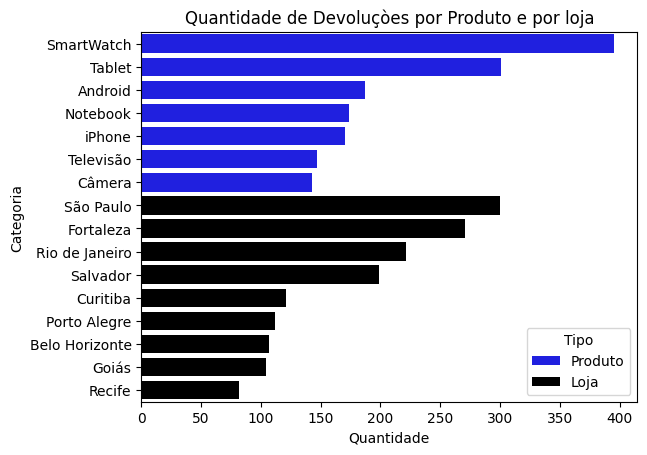

In [12]:
 # Criando DataFrame para GRÁFICO com base nos DataFrames originais
quantidade_produto_d_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_produto_d.index,
        'Quantidade': quantidade_produto_d['Quantidade'],
        'Tipo': ['Produto'] * len(quantidade_produto_d)
    }
) # Estrutura nome da coluna + informação que desejamos.
# Criando 3 colunas 'Categoria', 'Quantidade', 'Tipo'
# Coluna 'Categoria' passaremos informação 'Produto' mas com 1 index apenas, excluindo SKU.
# Coluna 'Quantidade' será a tabela quantidade pegando a colun ['Quantidade']
# Coluna 'Tipo' Definindo tanto a Coluna Produto como Loja ficarão dentro de uma coluna NOVA chamada Categooria, fazendo relação de duas informações/ Produto será incluído tantas * o numero de linhas, o len vai pegar o Produto e multiplicar por 7 vezes/linhas.

quantidade_loja_d_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_loja_d.index,
        'Quantidade': quantidade_loja_d['Quantidade'],
        'Tipo': ['Loja'] * len(quantidade_loja_d)
    }
)

# Concatenar os DataFrames
df_concatenado = pd.concat([quantidade_produto_d_grafico, quantidade_loja_d_grafico])

# Plotar o gráfico de barras horizontais
cores = {'Produto': 'blue', 'Loja': '000000'}
grafico5 = sns.barplot(data=df_concatenado, x='Quantidade', y='Categoria', hue='Tipo', orient='h', palette=cores)
grafico5.set_title('Quantidade de Devoluçòes por Produto e por loja')
#grafico5.set_xlabel('Rótulo do Eixo X')
 #grafico5.set_ylabel('Rótulo do Eixo Y')



**2.0 - ANÁLISE DE SAZONALIDADE:**

**Objetivo:** Calcular a variação das vendas dos produtos por mês.

In [13]:
# Trabalhando com data- Temos uma função do pandas que é pd.to_datetime para fazer uma formatação de uma data, então ele pede como primeiro parametro a data e como segundo parametro o tipo de formatação que quero especificar.

data_formatada = pd.to_datetime(total_vendas['Data'], format='%m/%d/%Y')

# Variavel venda_mensal que recebe uma tabela com data formatada concatenando com coluna de Quantidade- / Conceito novo dentro do DataFrame e abrir uma estrutura que precisa estar entre chaves{} /- Dentro da variavel venda_mensal, estou criando uma NOVA tabela, um novo DataFrame, passando na coluna 'Data' a data_formatada, ou seja a data organizada/formatada. - / E a 'Quantidade' vai receber a informação que é total_vendas pegando a coluna 'Quantidade'e atribuindo-a
vendas_mensais = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade']
    }
)# Montando um novo DataFrame onde eu estou pegando todas as informações cereais, contidas em data_formatada e estou pegando todas as informações da coluna 'Quantidade' da tabela total_vendas/coluna['Quantidade'] e passando para a nova coluna< Ou seja, estou pegando duas colunas pegando a tada formatada e uma outra coluna quantidade que está pegando da outra tabela total_vendas que tb tem 'Quantidade'

# Pegando o DataFrame acima, e construindo um novo e definindo a coluna 'Data' como index- adc MÉTODO .resample, usado para trabalhar com datas passando como parametro a letra 'M'porque quero que agrupe baseado no Mes/Month + sum() somar /
vendas_mensais = vendas_mensais.set_index('Data').resample('M').sum()

vendas_mensais.index = vendas_mensais.index.strftime('%b/%Y')
# + vendas_mensais.index (mudando direto na tabela) quero passar uma nova formatação, = ela propria, passando uma função, do pandas, chamada .strftime() que transforma formatação excluindo o que não for usar. anulando o dia

vendas_mensais['Variacao'] = vendas_mensais['Quantidade'].diff()
# Criando uma nova coluna para comparar a diferença de um mês para o outro, usando o método .diff() ele calcula a diferença entre um valor e o valor anterior numa série de dados. o diff que faz esse calculo, ele que vai ta sempre comparando um mes atual com o anterior. aumento comparado ao anterior,  decréscimo- Chamamos de Variação.- Só compara o ano completo, ou seja de janeiro para dezembro passado não pega e cpm isso ele retorna o NaN é a sigla para "Not a Number" (Não é um Número). É a forma que o Pandas e outras bibliotecas no ecossistema Python usam para indicar valores faltantes ou ausentes em um conjunto de dados.
display(HTML('<h2>Variação da quantidade de produtos vendidos por mês:</h2>'))
display(vendas_mensais)

# !! IMPORTANTE !! TODA TABELA PANDA PRECISA TER UM INDEX/INDICE, QUE É A CHAVE A INFORMAÇÀO PRINCIPAL, IGUAL POR EXEMPLO, QUANDO DEFINIMOS ANTERIORMENTE, SKU É UM INDEX, PRODUTO É UM INDEX. - INFORMAÇÕES CHAVE QUE UTILIZAMOS PARA FAZER BUSCAS E CONSULTAS.

# NO NOSSO CASO, PRECISAREMOS COLOCAR A COLUNA Data COMO INDEX QUE SERÁ ATRAVÉS DELA QUE FAREMOS TODO O PROCESSO DE AGRUPAMENTO.


,Quantidade,Variacao
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [14]:
# Gráfico de linha
text_color = np.where(vendas_mensais['Variacao'] < 0, 'red', 'green')
# Text_color recebe = np(biblioteca)+ .where metodo condicional + Dataframe(tabela)(vendas_mensais) + coluna (['variacao'] se essa informação é < 0, 'red', caso contrario, 'green')

grafico6 = px.line(vendas_mensais.reset_index(), x='Data', y='Quantidade', title='Vendas Mensais x Sazonalidades', markers=True, text=vendas_mensais['Quantidade'])
grafico6.update_traces(textposition='top center', textfont=dict(color=text_color, size=15), marker=dict(color=text_color)) # (textposition='top/middle/botton- disposicção horizontal center/right/left)


grafico6.show()


### Gráfico concluído:
- Aprendemos a usar uma nova biblioteca **NUMPY**
- Método .Where para fazer seleções condicionais
- Como utilizar um gráfico de linha grafico6 = px.line()
- Como configurar a posição do texto 'top center'
- Como alterar a cor do texto passando um dicionário text=dict(color=text_color,)
- Alterando as cores do marcador com marker=dict

## Lições aprendidas na aula 2.0 - ANÁLISE DE SAZONALIDADE:

 Aprendemos a comparar um mês com o outro. Conseguindo obter um indicativo bem legal pra gente saber se há algum padrão que podemos observar de SAZONALIDADE de tendências. Previsibilidade para enxergar padrões.

 Recursos novos aprendidos: Formatação envolvendo Data, a própria função .to_datetime do pandas.

 Aprendemos como fazer a inserção de novas informações/ um novo DataFrame pegando Informação de outras tabelas.

 Aprendemos também a setar informações, criar um index em uma determinada coluna de um DataFrame.

 Aprendemos também a fazer agrupamento de meses já fazendo um somatório das informações.

 Depois aprendemos a mexer com outro tipo de formação utilizando a função strftime.

 E finalizando com a inserção de uma nova coluna já atribuindo um calculo realizado pelo método diff() que faz um calculo de um item para o outro.

**2.1 - ANÁLISE DE FATURAMENTO TRIMESTRAL:**

**Objetivo:** Calcular o faturamento trimestral do ano.

In [15]:
# Montando/criando um DataFrame que é a NOSSA TABELA do PANDAS(passando alguns cauculos na estrutura da tabela)

# Tabela faturamento_trimestral que é um DataFrame com alguns ARGUMENTOS. - Uma estrutura: Coluna 'Data': data_formatada (que já havíamos criado). - /  Uma Coluna 'Quantidade': na tabela total_vendas[]'Quantidade'] - / Uma Coluna: 'Valor Unitário': na tabela total_vendas['Valor Unitário'], - / Uma Coluna 'Faturamento': recebe tabela_vendas['Quantidade'] * total_vendas['Valor Unitário']
faturamento_trimestral = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade'],
        'Valor Unitário': total_vendas['Valor Unitário'],
        'Faturamento': total_vendas['Quantidade'] * total_vendas['Valor Unitário'] # cria a coluna já aplicando o calculo lá dentro Quantidade multiplicado por Valor Unitário.
    }
)


# .dt.to_period('Q')
# Exemplos de valores possíveis:
# 'D' para dias
# 'W' para semanas
# 'M' para meses
# 'Q' para trimestres
# 'Y' para anos
faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')
# Criando uma nova Coluna dentro do DataFrame que vai fazer o agrupamento e dividir em 3, quarter/ Outra tabela. Jan/Fev/Marc Primeiro trimestre 'Q'
# Faturamento trismestral pegando a Colua 'Data' para conseguir fazer o agrupamento USANDO o MÉTODO do PANDAS chamado .dt.to_period Passando 'Q' 'Y' etc...

faturamento_trimestral = pd.DataFrame(faturamento_trimestral.groupby('Trimestre')['Faturamento'].sum())
# Fazendo agrupamento faturamento_trimestral recebe ele mesmo com .groupby(coluna que quer agrupar) E PARA PEGAR APENAS UMA COLUNA/FAZER UM FILTRO, Adicionamos ['Faturamento'] antes do sum()

display(HTML('<h2>Faturamento Trimestral:</h2>'))
display(faturamento_trimestral)

,Faturamento
Trimestre,
2023Q1,25038900
2023Q2,24163700
2023Q3,24970600
2023Q4,25146300


In [16]:
# Testando o cálculo do diff()
text_color = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue')
display(text_color)

array(['blue', 'red', 'blue', 'blue'], dtype='<U4')

In [17]:
# Gráfico de Área

# Transformando coluna Trimestre em texto(string)-
# Serializable de Dados é o processo de transformar estrutura de Dados, um objeto por exemplo em um formato que pode ser facilmente armazenado ou transmitido.
faturamento_trimestral.index = faturamento_trimestral.index.astype(str)
# Convertemos periodo/data que está agrupado em um texto simples. Pegamos o index e forçmos ela a ser astype o tipo str/string

text_color = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue')
# Reutilizando estrutura passando a biblioteca numpy onde temos o método/funcional where
# Dessa vez não precisamos da coluna 'Variação' passamos indiretamente com diff().
# Passamos tabela_trismestral na coluna [] 'Faturamento' e colocamos .diff() para fazer a variação.

# Criando 7timo gráfico usando px(biblioteca Python)+ area nome do estilo do gráfico. Passando tabela_trimestral, resetando para tirar os index, passando no Eixo X a COLUNA Trimestre da tabela. -, Eixo Y para 'Faturamento' + title para o título e markers=True para fazer as marcações, as bolinhas.
grafico7 = px.area(
    faturamento_trimestral.reset_index(),
    x='Trimestre',
    y='Faturamento',
    title='Faturamento Trimestral',
    markers=True)

# Editando o gráfico
grafico7.update_layout(
    xaxis_title='Título Eixo X',
    yaxis_title='Título Eixo Y',
    margin=dict(t=50, l=300, r=300, b=50), # Editando a margin com dict/dicionario
    title=dict(x=0.5) # Eixo X na parte branca está 50%
)

# Personalização de Linhas, mudando as cores e preenchimento. fillcolor=preenchimento+cor
grafico7.update_traces(
    fillcolor='rgba(27, 239, 143, 0.2)', # 0.2 = 20% - 1 = 100%
    line_color='rgba(27, 239, 143, 1)', # Red, Gren, Black, Alpha/opacidade/transparencia
    marker=dict(color=text_color) # Marker com variavel armazena diff(faz a diferença) - < 0, 'red', 'blue')
)

grafico7.show()

### Gráfico de Área

```
Gráfico da tabela Trimestral e os valores:
O gráfico de área é muito semelhante ao de linha,
a diferença está na parte preenchida pra que possamos ver o volume.
```
Enquanto no gráfico de linha ele só mostra a linha, no gráfico de área ele mostra a área preenchida. Outra coisa que muda no gráfico de área é que, o gráfico de área já começa bem no início da área de plotagem(linda inicial do gráfico)

#### Aprendizados:
- Convertemos uma tabela que tem um index para type texto str/string
- Utilizamos o método numpy para fazer seleção criteriosa
- Aprendemos a utilizar o diff() para fazer o cálculo direto na tabela
- Atribuição da propriedade margin com dict/dicionário
- Propriedade titlle passando a centralização
- Também aprendemos que é possível alterar o Eixo de fora do title e jogar para dentro do gráfico

#### Aprendemos a utilizar ese grafico colocando algumas personalizações:
- Muda a cor de preenchimento da Área
- Definimos uma cor para a linha
- Colocamos marcadores e definimos cores para esses
- Critério para alterar a cor conforme ao volume/queda de faturamento - blue/red



## Aprendemos nessa aula a organizar os dados da melhor forma para visualização usando tags HTML utilizando a biblioteca IPython,